<a href="https://colab.research.google.com/github/shyookml/fdl/blob/Chap.5/cifar_10_cnn_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load data**

In [1]:
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


# **Draw Figures**

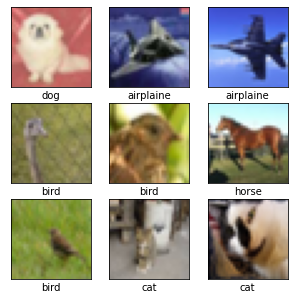

17369
(10000, 32, 32, 3)


In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

class_names=['airplaine','automobile','bird','cat','deer','dog','frog','horse','sheep','truck']

sample_size=9

random_idx=np.random.randint(50000,size=sample_size)
plt.figure(figsize=(5,5))
for i,idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  #x_test=x_train[idx,:,:,2]   # RGB 층을 분리해서 한 번 보면
  #plt.imshow(x_test,cmap='gray')
  plt.imshow(x_train[idx],cmap='gray')
  plt.xlabel(class_names[int(y_train[idx])])
plt.show()

print(idx)
print(x_test.shape)

# **Data Preprocessing**

In [3]:
x_mean=np.mean(x_train,axis=(0,1,2))
x_std=np.std(x_train,axis=(0,1,2))

x_train=(x_train-x_mean)/x_std
x_test=(x_test-x_mean)/x_std

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3)

print(x_train.shape,len(y_train))
print(x_val.shape,len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


# **Construct a model**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# get gup_device
gpu_device_name = tf.test.gpu_device_name()
with tf.device(gpu_device_name):
  model=Sequential()
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer=Adam(1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])
  # Learning
  history=model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))


Epoch 1/30
1094/1094 [==============================] - 19s 7ms/step - loss: 1.6216 - acc: 0.4140 - val_loss: 1.4340 - val_acc: 0.4966
Epoch 2/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.2617 - acc: 0.5499 - val_loss: 1.1934 - val_acc: 0.5775
Epoch 3/30
1094/1094 [==============================] - 7s 6ms/step - loss: 1.0809 - acc: 0.6182 - val_loss: 1.0519 - val_acc: 0.6314
Epoch 4/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.9407 - acc: 0.6710 - val_loss: 1.0105 - val_acc: 0.6457
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.8442 - acc: 0.7046 - val_loss: 0.9030 - val_acc: 0.6863
Epoch 6/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7535 - acc: 0.7403 - val_loss: 0.8461 - val_acc: 0.7100
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.6732 - acc: 0.7680 - val_loss: 0.8302 - val_acc: 0.7149
Epoch 8/30
1094/1094 [==============================] - 7s 6m

# **Check the learning process**

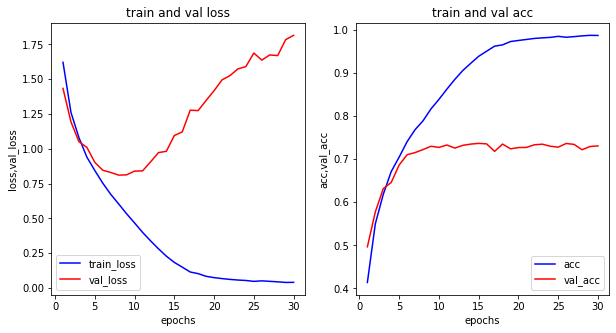

In [8]:
import matplotlib.pyplot as plt

hist_dict=history.history
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']
acc=hist_dict['acc']
val_acc=hist_dict['val_acc']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='red',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss,val_loss')
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='acc')
ax2.plot(epochs,val_acc,color='red',label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc,val_acc')
ax2.legend(loc='lower right')

plt.show()